<a href="https://colab.research.google.com/github/menobleknight/using-python-for-research/blob/main/week-3-part-3/intro-to-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Introduction to kNN Classification`
- `Statistical learning refers to a collection of mathematical and computation tools to understand data.`
- `In what is often called supervised learning, the goal is to estimate or predict an output based on one or more inputs.`
- `The inputs have many names, like predictors, independent variables features, and variables being called common.`
- `The output or outputs are often called response variables, or dependent variables.`
- `If the response is quantitative - say, a number that measures weight or height, we call these problems regression problems.`
- `If the response is qualitative - say, yes or no, or blue or green, we call these problems classification problems.`

In [ ]:
# distance between two points

import numpy as np

p1 = np.array([1, 1])
p2 = np.array([4, 4])

In [ ]:
p2 - p1

array([3, 3])

In [ ]:
np.power(p2 - p1, 2)

array([9, 9])

In [ ]:
np.sum(np.power(p2 - p1, 2))

18

In [ ]:
np.sqrt(np.sum(np.power(p2 - p1, 2)))

4.242640687119285

In [ ]:
def distance(p1, p2):
    ''' finds the distance between point p1 and p2 '''
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

p1 = np.array([1, 1])
p2 = np.array([4, 4])
distance(p1, p2)

4.242640687119285

In [16]:
# most common vote (or majority vote) in sequence of votes

import random

def majority_vote(votes):
    ''' return most common vote in votes '''
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1

    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)

    return random.choice(winners) # in case of multiple winners

votes = [1, 2, 3, 1, 2, 3, 3, 3, 3]
winner = majority_vote(votes)
winner

3

In [17]:
votes = [1, 2, 3, 1, 2, 3, 3, 3, 3, 2, 2, 2]
majority_vote(votes) # random.choice([2, 3])

2

In [20]:
votes = [1, 2, 3, 1, 2, 3, 3, 3, 3, 2, 2, 2]
majority_vote(votes) # random.choice([2, 3])

2

In [21]:
votes = [1, 2, 3, 1, 2, 3, 3, 3, 3, 2, 2, 2]
majority_vote(votes) # random.choice([2, 3])

3

In [22]:
# finding majority vote is same as finding mode 

import scipy.stats as ss

def majority_vote_short(votes):
    ''' return most common vote in votes '''
    mode, count = ss.mstats.mode(votes)
    return mode

votes = [1, 2, 3, 1, 2, 3, 3, 3, 3, 2, 2, 2]
majority_vote_short(votes)

array([2.])

In [23]:
votes = [1, 2, 3, 1, 2, 3, 3, 3, 3, 2, 2, 2]
majority_vote_short(votes) # returns same value every time

array([2.])

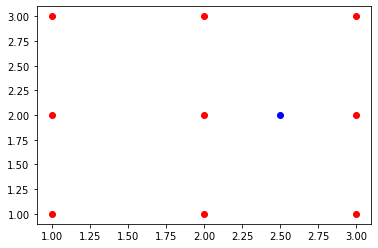

In [26]:
# finding nearest neighbors

import matplotlib.pyplot as plt

points = np.array([[1, 1], [1, 2], [1, 3], [2, 1], [2, 2], [2, 3], [3, 1], [3, 2], [3, 3]])
p = np.array([2.5, 2])

plt.plot(points[:, 0], points[:, 1], "ro"); # "ro" - red circle
plt.plot(p[0], p[1], "bo"); # "bo" - blue circle

In [28]:
distances = np.zeros(points.shape[0]) # length of distances is same as number of rows in points

for i in range(len(points)):
    distances[i] = distance(p, points[i])

distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [29]:
points[4]

array([2, 2])

In [30]:
distances[4] # distance of points[4] = [2, 2] from p = [2.5, 2]

0.5

In [31]:
points[7]

array([3, 2])

In [32]:
distances[4] # distance of points[4] = [3, 2] from p = [2.5, 2]

0.5

In [33]:
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [34]:
indices = np.argsort(distances)
indices

array([4, 7, 3, 5, 6, 8, 1, 0, 2])

In [35]:
distances[indices] # we get sorted array of distances

array([0.5       , 0.5       , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 1.5       , 1.80277564, 1.80277564])

In [36]:
distances[indices[0:2]] # first two points with minimum distance from p = [2.5, 2]

array([0.5, 0.5])

In [38]:
def find_nearest_neighbors(p, points, k=5):
    ''' finds the k nearest neighbors of point p and return their indices. '''
    distances = np.zeros(points.shape[0])
    for i in range(len(points)):
        distances[i] = distance(p, points[i])

    indices = np.argsort(distances)

    return indices[:k]

points = np.array([[1, 1], [1, 2], [1, 3], [2, 1], [2, 2], [2, 3], [3, 1], [3, 2], [3, 3]])
p = np.array([2.5, 2])

indices = find_nearest_neighbors(p, points, k=2) # 2 nearest neighbors
points[indices]

array([[2, 2],
       [3, 2]])

In [39]:
indices = find_nearest_neighbors(p, points, k=3) # 3 nearest neighbors
points[indices]

array([[2, 2],
       [3, 2],
       [2, 1]])

In [40]:
indices = find_nearest_neighbors(p, points, k=4) # 4 nearest neighbors
points[indices]

array([[2, 2],
       [3, 2],
       [2, 1],
       [2, 3]])

In [41]:
# predict the class of new point

def knn_predict(p, points, outcomes, k=5):
    indices = find_nearest_neighbors(p, points, k) # find nearest neighbors
    return majority_vote(outcomes[indices])

outcomes = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1]) # first 4 points belongs to class 0 and next 5 points belongs to class 1

p = np.array([2.5, 2.7])
knn_predict(p, points, outcomes, k=2)

1

- `we have 2 different classes of our point - class 0 and class 1.`
- `point p = [2.5, 2.7] belongs to class 1, according to knn_predict().`

In [42]:
p = np.array([1.0, 2.7])
knn_predict(p, points, outcomes, k=2)

0

- `similarly point p = [1.0, 2.7] belongs to class 0, according to knn_predict().`

In [43]:
# generating synthetic data

import scipy.stats as ss

ss.norm(0, 1).rvs((5, 2)) # mean = 0, standard-deviation = 1, 5 row and 2 columns

array([[-1.84047015, -0.37680919],
       [ 0.69926335, -0.74470343],
       [-0.33039644, -0.06431417],
       [-0.74340474, -1.04226604],
       [-1.34185244, -0.72876658]])

In [44]:
ss.norm(1, 1).rvs((5, 2)) # mean = 1, standard-deviation = 1, 5 row and 2 columns

array([[ 1.40348061,  1.70993507],
       [ 0.56281391, -0.20854063],
       [ 1.81743303,  1.44150333],
       [-0.0242506 ,  0.85122418],
       [ 1.69338413,  0.74859018]])

In [45]:
np.concatenate((ss.norm(0, 1).rvs((5, 2)), ss.norm(1, 1).rvs((5, 2))), axis=0) # concatenate along rows (10 rows and 2 columns)

array([[-0.61384238, -0.06654529],
       [-0.45168615,  1.22268833],
       [-1.15091229, -0.22610866],
       [-0.41402676,  1.00078442],
       [ 1.22707938, -1.94856043],
       [-0.4931675 ,  1.48102001],
       [ 0.92972551,  0.77788811],
       [ 0.44503303,  0.16365368],
       [ 1.56397496,  0.11705214],
       [ 0.99214941,  0.92231152]])

In [46]:
np.repeat(0, 5) 

array([0, 0, 0, 0, 0])

In [47]:
np.repeat(1, 5)

array([1, 1, 1, 1, 1])

In [49]:
np.concatenate((np.repeat(0, 5), np.repeat(1, 5)))

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [50]:
def generate_synthetic_data(n=50):
    ''' create two sets of points from bivariate normal distributions. '''
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis=0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))

    return (points, outcomes)

n = 20
(points, outcomes) = generate_synthetic_data(n)

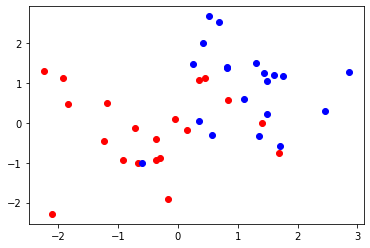

In [55]:
plt.plot(points[:n, 0], points[:n, 1], "ro"); # values in class 0 i.e., first n values
plt.plot(points[n:, 0], points[n:, 1], "bo"); # values in class 1 i.e., last n values

In [66]:
x = np.arange(0, 10, 2)
y = np.arange(0, 10, 2)
columns, rows = np.meshgrid(x, y) # generated 2D grid
print(f'x coordinates: \n{columns}\n') # x coordinates
print(f'y coordinates: \n{rows}')      # y coordinates

x coordinates: 
[[0 2 4 6 8]
 [0 2 4 6 8]
 [0 2 4 6 8]
 [0 2 4 6 8]
 [0 2 4 6 8]]

y coordinates: 
[[0 0 0 0 0]
 [2 2 2 2 2]
 [4 4 4 4 4]
 [6 6 6 6 6]
 [8 8 8 8 8]]


In [70]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    ''' classify each point on prediction grid. '''
    (x_min, x_max, y_min, y_max) = limits
    x = np.arange(x_min, x_max, h)
    y = np.arange(y_min, y_max, h)
    x_, y_ = np.meshgrid(x, y)

    prediction_grid = np.zeros(x_.shape, dtype=int) # or np.zeros(y_.shape, dtype=int)

    for i, _x in enumerate(x):
        for j, _y in enumerate(y):
            p = np.array([_x, _y])
            prediction_grid[j, i] = knn_predict(p, predictors, outcomes, k)

    return (x_, y_, prediction_grid)

In [71]:
def plot_prediction_grid (x_, y_, prediction_grid):
    ''' plot knn predictions for every point on the grid. '''
    from matplotlib.colors import ListedColormap

    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])

    plt.pcolormesh(x_, y_, prediction_grid, cmap=background_colormap, alpha=0.5)
    plt.scatter(predictors[:, 0], predictors [:, 1], c=outcomes, cmap=observation_colormap, s=50)
    plt.xlabel('variable 1')
    plt.ylabel('variable 2')
    plt.xticks(()) 
    plt.yticks(())
    plt.xlim(np.min(x_), np.max(x_))
    plt.ylim (np.min(y_), np.max(y_))
    plt.plot();

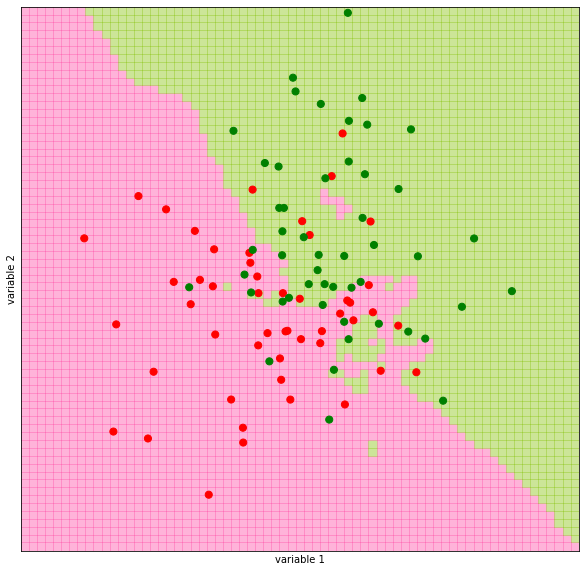

In [77]:
(predictors, outcomes) = generate_synthetic_data()

k = 5
limits = (-3, 4, -3, 4)
h = 0.1 # step size
(x_, y_, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(x_, y_, prediction_grid)

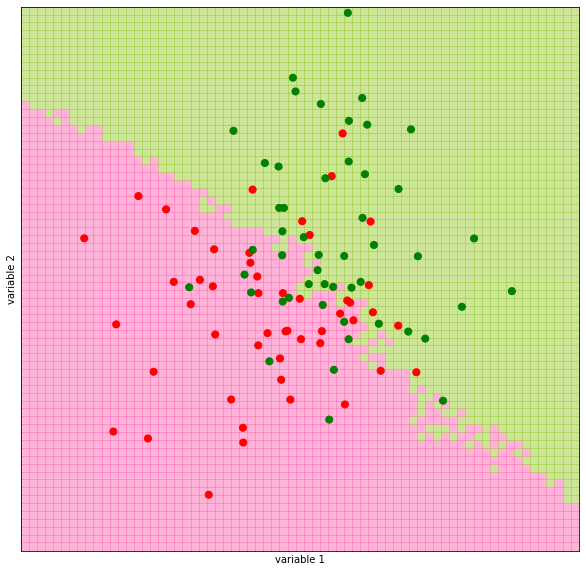

In [78]:
k = 50 # as k increases, decision boundary becomes smooth
limits = (-3, 4, -3, 4)
h = 0.1 # step size
(x_, y_, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(x_, y_, prediction_grid)

**`Iris data-set`**

- `Iris data set created by Ron Fisher in 1933.`
- `It consists of 150 different iris flowers.`
- `50 from each of three different species.`
- `For each flower, we have the following covariates :`
    - `sepal length` 
    - `sepal width` 
    - `petal length`
    - `petal width`


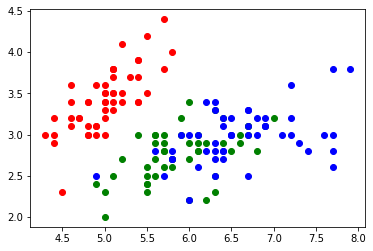

In [79]:
# testing knn classifier on real data-set

from sklearn import datasets

iris = datasets.load_iris()
predictors = iris.data[:, 0:2] # select first two columns only
outcomes = iris.target

plt.plot(predictors[outcomes == 0][:, 0], predictors[outcomes == 0][:, 1], "ro");
plt.plot(predictors[outcomes == 1][:, 0], predictors[outcomes == 1][:, 1], "go");
plt.plot(predictors[outcomes == 2][:, 0], predictors[outcomes == 2][:, 1], "bo");

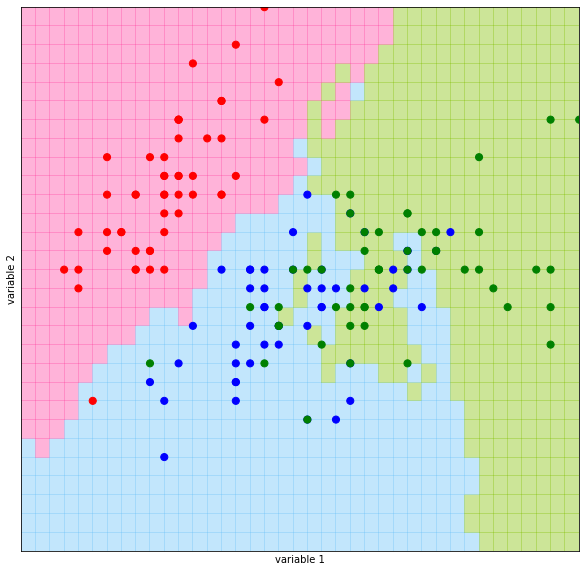

In [80]:
k = 5
limits = (4, 8, 1.5, 4.5)
h = 0.1 # step size
(x_, y_, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(x_, y_, prediction_grid)

In [83]:
# comparison between knn_predict and KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(predictors, outcomes)

sk_predictions = knn.predict(predictors)

sk_predictions.shape

(150,)

In [84]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, k=5) for p in predictors])

my_predictions.shape

(150,)

In [85]:
# check how often sk_predictions agree with my_predictions

sk_predictions == my_predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [86]:
np.mean(sk_predictions == my_predictions)

0.96

In [87]:
# check percentage of how often sk_predictions agree with my_predictions

100 * np.mean(sk_predictions == my_predictions)

96.0

In [88]:
# check percentage of how often sk_predictions agree with actual outcomes

100 * np.mean(sk_predictions == outcomes)

83.33333333333334

In [89]:
# check percentage of how often my_predictions agree with actual outcomes

100 * np.mean(my_predictions == outcomes)

84.66666666666667